<a href="https://colab.research.google.com/github/nikhilparab17/Time-Series-Forecasting-for-CO2-Levels/blob/master/cs229_CO2_forecasting_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start Program...
Loading .xlsx data... https://github.com/nikhilparab17/Time-Series-Forecasting-for-CO2-Levels/blob/master/data/co2_dataset_preprocess.xlsx?raw=true


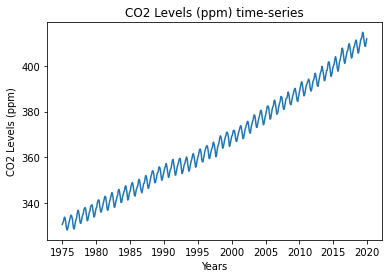

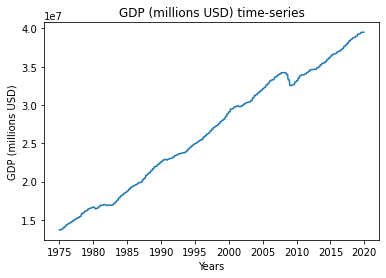

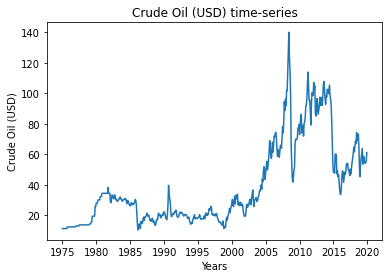


Running Cross-Validation for Hypothesis 1...
Loading .xlsx data... https://github.com/nikhilparab17/Time-Series-Forecasting-for-CO2-Levels/blob/master/data/cv/co2_monthly_process_up_1.xlsx?raw=true
Loading .xlsx data... https://github.com/nikhilparab17/Time-Series-Forecasting-for-CO2-Levels/blob/master/data/cv/co2_monthly_process_up_2.xlsx?raw=true
Loading .xlsx data... https://github.com/nikhilparab17/Time-Series-Forecasting-for-CO2-Levels/blob/master/data/cv/co2_monthly_process_up_3.xlsx?raw=true
Loading .xlsx data... https://github.com/nikhilparab17/Time-Series-Forecasting-for-CO2-Levels/blob/master/data/cv/co2_monthly_process_up_4.xlsx?raw=true
Loading .xlsx data... https://github.com/nikhilparab17/Time-Series-Forecasting-for-CO2-Levels/blob/master/data/cv/co2_monthly_process_up_5.xlsx?raw=true
Loading .xlsx data... https://github.com/nikhilparab17/Time-Series-Forecasting-for-CO2-Levels/blob/master/data/cv/co2_monthly_process_up_6.xlsx?raw=true
Loading .xlsx data... https://github

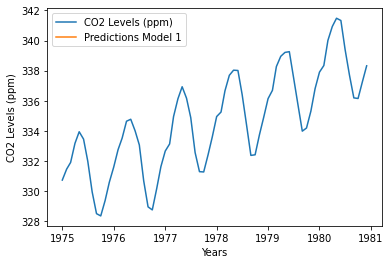

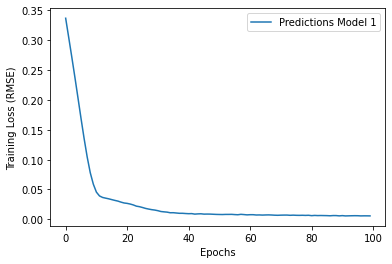

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 1, 10)             920       
_________________________________________________________________
lstm_16 (LSTM)               (None, 10)                840       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 1,771
Trainable params: 1,771
Non-trainable params: 0
_________________________________________________________________
None
RMSE: Train Score: 0.532 Test Score: 0.449 RMSE
create and fit LSTM model..
compute rms error... 
plot and save results... 


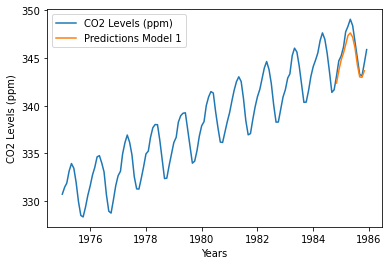

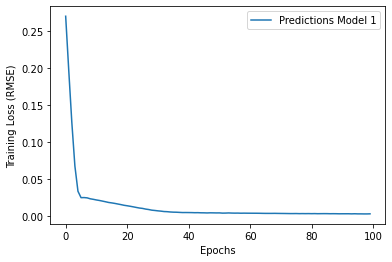

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 1, 10)             920       
_________________________________________________________________
lstm_18 (LSTM)               (None, 10)                840       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 1,771
Trainable params: 1,771
Non-trainable params: 0
_________________________________________________________________
None
RMSE: Train Score: 0.460 Test Score: 0.884 RMSE
create and fit LSTM model..
compute rms error... 
plot and save results... 


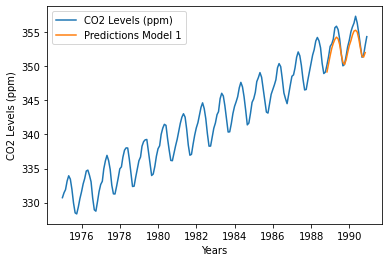

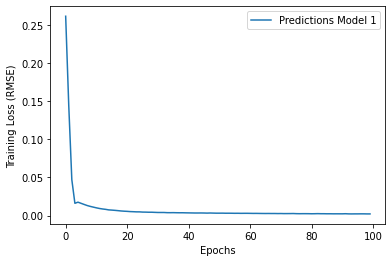

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 1, 10)             920       
_________________________________________________________________
lstm_20 (LSTM)               (None, 10)                840       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 1,771
Trainable params: 1,771
Non-trainable params: 0
_________________________________________________________________
None
RMSE: Train Score: 0.530 Test Score: 1.042 RMSE
create and fit LSTM model..


In [ ]:
#include paths
import numpy as np
import pandas as pd
import datetime as dt
from pandas import DataFrame
from pandas import concat
import math
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from statsmodels.tools.eval_measures import rmse
from keras.regularizers import l2

# Whole Dataset
DATASET = "https://github.com/nikhilparab17/Time-Series-Forecasting-for-CO2-Levels/blob/master/data/co2_dataset_preprocess.xlsx?raw=true"

# Cross-Validation Dataset
CV_DATASET = \
["https://github.com/nikhilparab17/Time-Series-Forecasting-for-CO2-Levels/blob/master/data/cv/co2_monthly_process_up_1.xlsx?raw=true" ,
 "https://github.com/nikhilparab17/Time-Series-Forecasting-for-CO2-Levels/blob/master/data/cv/co2_monthly_process_up_2.xlsx?raw=true" ,
 "https://github.com/nikhilparab17/Time-Series-Forecasting-for-CO2-Levels/blob/master/data/cv/co2_monthly_process_up_3.xlsx?raw=true" ,
 "https://github.com/nikhilparab17/Time-Series-Forecasting-for-CO2-Levels/blob/master/data/cv/co2_monthly_process_up_4.xlsx?raw=true",
 "https://github.com/nikhilparab17/Time-Series-Forecasting-for-CO2-Levels/blob/master/data/cv/co2_monthly_process_up_5.xlsx?raw=true",
 "https://github.com/nikhilparab17/Time-Series-Forecasting-for-CO2-Levels/blob/master/data/cv/co2_monthly_process_up_6.xlsx?raw=true",
 "https://github.com/nikhilparab17/Time-Series-Forecasting-for-CO2-Levels/blob/master/data/cv/co2_monthly_process_up_7.xlsx?raw=true"
 ]

# function to load data
def loadExcelData(filepath):
  print("Loading .xlsx data...", filepath)
  excelData = pd.ExcelFile(filepath)
  data = excelData.parse()
  return data


# function to convert data to 
# pandas datetime series
def convert_datetime(data):
  data.index = data['YEAR'].apply(lambda x: dt.datetime.strptime(x, '%Y/%m/%d'))
  del data['YEAR']
  return data

# function for data visualization
def data_visualization(data, feature):
  plt.plot(data.index, data)
  plt.xlabel("Years")
  plt.ylabel(feature)
  plt.title(feature + " time-series")
  plt.show()
  plt.clf()

# function to transform (normalize) data 
def transform(train, test):
  scalar = MinMaxScaler(feature_range=(0,1))
  scalar.fit(train)

  # transform train
  train = train.reshape(train.shape[0], train.shape[1])
  train_scaled = scalar.transform(train)

  # transform test
  test_scaled = test.reshape(test.shape[0], test.shape[1])
  test_scaled = scalar.transform(test)

  return scalar, train_scaled, test_scaled


# function to build and fit LSTM model
def fit_LSTM(x_train, y_train,
             batch_size=1, num_epoch=100,
             neurons=5, num_layers=1, 
             train_noise = True, reg_factor = 0.0001):
  
  model = Sequential()
  # add lstm-layers
  if num_layers > 1:
    model.add(LSTM(neurons, input_shape=(x_train.shape[1],x_train.shape[2]), 
                   return_sequences=True,
                   kernel_regularizer=l2(reg_factor), 
                   recurrent_regularizer=l2(reg_factor), 
                   bias_regularizer=l2(reg_factor)))
    model.add(LSTM(neurons, return_sequences=False,
                   kernel_regularizer=l2(reg_factor), 
                   recurrent_regularizer=l2(reg_factor), 
                   bias_regularizer=l2(reg_factor)))
  else:
    model.add(LSTM(neurons, input_shape=(x_train.shape[1], x_train.shape[2]), 
                   return_sequences=False,
                   kernel_regularizer=l2(reg_factor), 
                   recurrent_regularizer=l2(reg_factor), 
                   bias_regularizer=l2(reg_factor)))
  # dense layer
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  train_error = []
  if True:
    x_train_orig = x_train

    for it in np.arange(num_epoch):
      if train_noise == True:
        sample_noise = np.random.normal(0, 0.02,np.shape(x_train))
        x_train = x_train_orig + sample_noise
      else:
        x_train = x_train_orig
        
      hist = model.fit(x_train, y_train, epochs=1,
                     batch_size=batch_size, verbose=False, shuffle=False)
      
      train_error.append(hist.history['loss'])
  else:
    hist = model.fit(x_train, y_train, epochs=num_epoch,
                     batch_size=batch_size, verbose=False, shuffle=False)
    train_error = hist.history['loss']

  
  return [model, train_error]


# function to convert input data into a lstm dataset format
def create_dataset(dataset, look_back=1, index=0):
	dataX, dataY = [], []
	for i in range(dataset.shape[0]-look_back-1):
		a = dataset[i:(i+look_back), index]
		dataX.append(a)
		dataY.append(dataset[i + look_back, index])
	return np.array(dataX), np.array(dataY)

# function to train model and predict output
def train_and_predict(data, hypothesis = 1,
                      look_back = 2, num_features = 2, add_noise = True, 
                      num_layers = 1, num_neurons = 4, num_epochs = 100,
                      batch_size = 5, regularization_factor = 0.0001):

  # convert time to numpy array as required for training
  data_numpy = data.to_numpy()

  #split data into train and val set
  split = data_numpy.shape[0] - int((0.2*data_numpy.shape[0]))
  train, val = data_numpy[:split,:],data_numpy[split:,:]
  
  # transform only CO2 data for recovering CO2 from 'scalar_co2'
  train_co2, val_co2 = data_numpy[:split,0], data_numpy[split:,0] 
  scaler_co2, train_co2_scaled, val_co2_scaled = transform(train_co2.reshape(-1,1),
                                                           val_co2.reshape(-1,1))

  # transform whole data
  scaler, train_scaled, val_scaled = transform(train, val)

  # create lookback dataset
  if hypothesis == 2:
    # hyothesis-2 (CO2 levels + GDP)
    
    # feature-CO2
    trainX_CO2, trainY_CO2 = create_dataset(train_scaled, look_back, 0)
    valX_CO2, valY_CO2 = create_dataset(val_scaled, look_back, 0)
    trainX_CO2 = np.reshape(trainX_CO2, (trainX_CO2.shape[0],1, trainX_CO2.shape[1]))
    valX_CO2 = np.reshape(valX_CO2, (valX_CO2.shape[0],1, valX_CO2.shape[1]))
    
    # feature-GDP
    trainX_GDP, trainY_GDP = create_dataset(train_scaled, look_back, 1)
    valX_GDP, valY_GDP = create_dataset(val_scaled, look_back, 1)
    trainX_GDP = np.reshape(trainX_GDP ,(trainX_GDP.shape[0],1, trainX_GDP.shape[1]))
    valX_GDP = np.reshape(valX_GDP ,(valX_GDP.shape[0],1, valX_GDP.shape[1]))
    
    #concatenate features
    trainX = np.concatenate((trainX_CO2, trainX_GDP), axis = 1)
    valX = np.concatenate((valX_CO2, valX_GDP), axis = 1)

  elif hypothesis == 3:
    # hyothesis-3 (CO2 levels + Crude Oil)

    # feature-CO2
    trainX_CO2, trainY_CO2 = create_dataset(train_scaled, look_back, 0)
    valX_CO2, valY_CO2 = create_dataset(val_scaled, look_back, 0)
    trainX_CO2 = np.reshape(trainX_CO2, (trainX_CO2.shape[0],1, trainX_CO2.shape[1]))
    valX_CO2 = np.reshape(valX_CO2, (valX_CO2.shape[0],1, valX_CO2.shape[1]))
    

    # feature-OIL
    trainX_OIL, trainY_OIL = create_dataset(train_scaled, look_back, 2)
    valX_OIL, valY_OIL = create_dataset(val_scaled, look_back, 2)
    trainX_OIL = np.reshape(trainX_OIL ,(trainX_OIL.shape[0],1, trainX_OIL.shape[1]))
    valX_OIL = np.reshape(valX_OIL ,(valX_OIL.shape[0],1, valX_OIL.shape[1]))

    #concatenate features
    trainX = np.concatenate((trainX_CO2, trainX_OIL), axis = 1)
    valX = np.concatenate((valX_CO2, valX_OIL), axis = 1)

  elif hypothesis == 4:
    # hyothesis-4 (CO2 levels + GDP + Crude OIL)

    # feature-CO2
    trainX_CO2, trainY_CO2 = create_dataset(train_scaled, look_back, 0)
    valX_CO2, valY_CO2 = create_dataset(val_scaled, look_back, 0)
    trainX_CO2 = np.reshape(trainX_CO2, (trainX_CO2.shape[0],1, trainX_CO2.shape[1]))
    valX_CO2 = np.reshape(valX_CO2, (valX_CO2.shape[0],1, valX_CO2.shape[1]))
    
    # feature-GDP
    trainX_GDP, trainY_GDP = create_dataset(train_scaled, look_back, 1)
    valX_GDP, valY_GDP = create_dataset(val_scaled, look_back, 1)
    trainX_GDP = np.reshape(trainX_GDP ,(trainX_GDP.shape[0],1, trainX_GDP.shape[1]))
    valX_GDP = np.reshape(valX_GDP ,(valX_GDP.shape[0],1, valX_GDP.shape[1]))

    # feature-OIL
    trainX_OIL, trainY_OIL = create_dataset(train_scaled, look_back, 2)
    valX_OIL, valY_OIL = create_dataset(val_scaled, look_back, 2)
    trainX_OIL = np.reshape(trainX_OIL ,(trainX_OIL.shape[0],1, trainX_OIL.shape[1]))
    valX_OIL = np.reshape(valX_OIL ,(valX_OIL.shape[0],1, valX_OIL.shape[1]))
    
    #concatenate features
    trainX = np.concatenate((trainX_CO2, trainX_GDP, trainX_OIL), axis = 1)
    valX = np.concatenate((valX_CO2, valX_GDP, valX_OIL), axis = 1)

  else: 
    # hypothesis-1 (CO2 levels)
    # feature-CO2
    trainX_CO2, trainY_CO2 = create_dataset(train_scaled, look_back, 0)
    valX_CO2, valY_CO2 = create_dataset(val_scaled, look_back, 0)
    trainX_CO2 = np.reshape(trainX_CO2, (trainX_CO2.shape[0],1, trainX_CO2.shape[1]))
    valX_CO2 = np.reshape(valX_CO2, (valX_CO2.shape[0],1, valX_CO2.shape[1]))
    trainX = trainX_CO2
    valX = valX_CO2


  trainY = trainY_CO2
  valY  = valY_CO2
  #fit model
  print("create and fit LSTM model..")
  [model, epoch_error] = fit_LSTM(trainX, trainY, 
                                  batch_size=batch_size, num_epoch=num_epochs, 
                                  neurons = num_neurons, num_layers= num_layers, 
                                  train_noise = add_noise, 
                                  reg_factor = regularization_factor)


  # forecast the training data to build up state for forecasting
  trainPredict = model.predict(trainX)
  valPredict = model.predict(valX)

  # invert transformation
  trainPredict = scaler_co2.inverse_transform(trainPredict)
  trainY = scaler_co2.inverse_transform([trainY])
  valPredict = scaler_co2.inverse_transform(valPredict)
  valY = scaler_co2.inverse_transform([valY])
    
  # calculate root mean squared error
  print("compute rms error... ")
  trainScore = rmse(trainY[0,:], trainPredict[:,0])
  valScore = rmse(valY[0,:], valPredict[:,0])
    
  # shift train predictions for plotting
  print("plot and save results... ")
  trainPredictPlot = np.empty_like(data_numpy)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

  # shift test predictions for plotting
  valPredictPlot = np.empty_like(data_numpy)
  valPredictPlot[:, :] = np.nan
  valPredictPlot[len(trainPredict)+ (look_back*2) + 1:len(data_numpy)-1, :] = valPredict

  # plot baseline, predictions and save results
  #if hypothesis == 1:
  plt.plot(data.index, data["CO2 Levels"], label = "CO2 Levels (ppm)")
  plt.plot(data.index, valPredictPlot[:,0], 
           label = "Predictions Model " + str(hypothesis))
  plt.xlabel("Years")
  plt.ylabel("CO2 Levels (ppm)")
  plt.savefig("lstm_prediction.png")
  plt.legend()
  plt.show()
  plt.clf()

  # plot train error
  plt.plot(epoch_error, 
           label = "Predictions Model " + str(hypothesis))
  plt.xlabel("Epochs")
  plt.ylabel("Training Loss (RMSE)")
  plt.legend()
  plt.savefig("lstm_trainingloss.png")
  plt.show()
  plt.clf()

  # plot model
  print(model.summary())
  plot_model(model, 
             to_file='model_' + str(hypothesis) + '.png', 
             show_shapes=True, show_layer_names=False)
  print('RMSE: Train Score: %.3f Test Score: %.3f RMSE' % (trainScore, valScore))

  return valScore


# k-fold nested cross validation for time series data
def run_cross_validation(model_hyp = 1, 
                         model_features = 1, model_look_back_length = 1,
                         model_num_layers = 1, model_num_neurons_per_layer = 5,
                         model_regularization_factor = 0.001, train_add_noise = True, 
                         train_num_epochs = 100, train_batch_size = 5):
  cross_val = []
  cross_val_rms = []
  kval_nested_kfold = 7

  for k in np.arange(kval_nested_kfold):
    csv_data = loadExcelData(CV_DATASET[k])
    cross_val.append(convert_datetime(csv_data))

  for i in np.arange(len(cross_val)):
    # run lstm-model
    error = train_and_predict(cross_val[i],hypothesis = model_hyp , 
                              look_back = model_look_back_length,
                              num_features = model_features,
                              num_layers = model_num_layers,
                              num_neurons = model_num_neurons_per_layer,
                              add_noise = train_add_noise,
                              regularization_factor = model_regularization_factor,
                              num_epochs = train_num_epochs, batch_size = train_batch_size)
    cross_val_rms.append(error)
    

  print("Cross-Val RMS Error:", np.around(cross_val_rms, 3))
  return np.mean(cross_val_rms)


def main(dataset_visualization = False,
         model_hypothesis = 1,
         model_train_and_cross_validation = True,
         model_test_evaluation = True):
  
    print('Start Program...')

    df = loadExcelData(DATASET)

    # convert to datetime
    df = convert_datetime(df)

    if dataset_visualization == True:
      # data visualization
      data_visualization(df["CO2 Levels"], "CO2 Levels (ppm)")
      data_visualization(df["GDP"], "GDP (millions USD)")
      data_visualization(df["Crude Oil"], "Crude Oil (USD)")

    if model_train_and_cross_validation == True:
      
        print("\nRunning Cross-Validation for Hypothesis " + str(model_hypothesis) + "...")
        if model_hypothesis == 2 or model_hypothesis == 3:
          hyp_features = 2
        if model_hypothesis == 4:
          hyp_features = 3
        if model_hypothesis == 1:
          hyp_features = 1

        ############# HYPERPARAMETER TUNING PARAMETERS #########################
        hyp_look_back = 12
        hyp_regularization_factor = 0.0001
        hyp_layers = 2
        hyp_neurons = 10
        #######################################################################
        
        hyp_add_train_noise = True
        avg_error = run_cross_validation(model_hyp = model_hypothesis, 
                                         model_features = hyp_features,
                                         model_look_back_length = hyp_look_back,
                                         model_num_layers = hyp_layers,
                                         model_num_neurons_per_layer = hyp_neurons,
                                         model_regularization_factor = hyp_regularization_factor,
                                         train_add_noise = hyp_add_train_noise
                                     )
        print("Hypothesis: " + str(model_hypothesis) + ", CROSS-VAL AVG. RMSE ERROR:", avg_error)
    
    
    if model_test_evaluation == True:

      if model_hypothesis == 1:
        ############ test evaluation on winner hypothesis-1 ######################
        print("\nwinner hypothesis-1 (CO2 levels) evaluation on test dataset")
        hyp_features = 1
        hyp_look_back = 1
        hyp_regularization_factor = 0.0001
        hyp_layers = 1
        hyp_neurons = 5
        hyp_add_train_noise = True

        # run lstm-model
        error = train_and_predict(df, hypothesis = model_hypothesis,
                                  look_back = hyp_look_back,
                                  num_features = hyp_features, 
                                  num_layers = hyp_layers,
                                  num_neurons = hyp_neurons,
                                  add_noise = hyp_add_train_noise,
                                  regularization_factor = hyp_regularization_factor)
        ##########################################################################

      if model_hypothesis == 2:
        ############ test evaluation on winner hypothesis-2 ######################
        print("\nwinner hypothesis-2 (CO2 levels + GDP) evaluation on test dataset")
        hyp_features = 2
        hyp_look_back = 2
        hyp_regularization_factor = 0.0001
        hyp_layers = 2
        hyp_neurons = 10
        hyp_add_train_noise = True

        # run lstm-model
        error = train_and_predict(df, hypothesis = model_hypothesis,
                                  look_back = hyp_look_back,
                                  num_features = hyp_features, num_layers = hyp_layers,
                                  num_neurons = hyp_neurons,
                                  add_noise = hyp_add_train_noise,
                                  regularization_factor = hyp_regularization_factor)
        ##########################################################################

      if model_hypothesis == 3: 
        ############ test evaluation on winner hypothesis-3 ######################
        print("\nwinner hypothesis-3 (CO2 levels + Crude Oil) evaluation on test dataset")
        hyp_features = 2
        hyp_look_back = 2
        hyp_regularization_factor = 0.0001
        hyp_layers = 2
        hyp_neurons = 10
        hyp_add_train_noise = True

        # run lstm-model
        error = train_and_predict( df, hypothesis = model_hypothesis,
                                  look_back = hyp_look_back,
                                  num_features = hyp_features,
                                  num_layers = hyp_layers,
                                  num_neurons = hyp_neurons,
                                  add_noise = hyp_add_train_noise,
                                  regularization_factor = hyp_regularization_factor)
        ##########################################################################
      
      if model_hypothesis == 4:
        ############ test evaluation on winner hypothesis-4 ######################
        print("\nwinner hypothesis-4 (CO2 levels + GDP + Crude Oil) evaluation on test dataset")
        hyp_features = 3
        hyp_look_back = 2
        hyp_regularization_factor = 0.0001
        hyp_layers = 2
        hyp_neurons = 10
        hyp_add_train_noise = True

        # run lstm-model
        error = train_and_predict(df, hypothesis = model_hypothesis,
                                  look_back = hyp_look_back,
                                  num_features = hyp_features, num_layers = hyp_layers,
                                  num_neurons = hyp_neurons,
                                  add_noise = hyp_add_train_noise,
                                  regularization_factor = hyp_regularization_factor)
        ##########################################################################

    print('End of Program...')

if __name__ == '__main__':
  main(dataset_visualization = True,
       model_hypothesis = 1,
       model_train_and_cross_validation = True,
       model_test_evaluation = True)
